In [18]:
# Initialisation
import write_files as wf
import lpse_data as ld
import random_srs as rs
import matplotlib.pyplot as plt
import numpy as np
import copy

# Ipython magic features
%load_ext autoreload
%autoreload 2
  
# LPSE class
lpse = ld.lpse_case()
lpse.dfp = './data/lpse.' # Data file prefix
lpse.verbose = False # Show prints
lpse.np = 1 # Number of processors
lpse.bin = '../../bin/lpse_cpu' # Binary location

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To get implemented attribute options call the self.options() method for each setup class. The LPSE user guide contains additional options to those currently facilitated by the setup classes.

# Job Control

In [19]:
jc = wf.job_control()
jc.version = '3.2.11' 
jc.seed = 0 # 0 for random, otherwise fixed seed
jc.resources.heartbeatInterval = 0.1 # minutes
lpse.add_class(jc)

# Gridding

In [20]:
gr = wf.gridding()
gr.grid.sizes = 108 # microns
gr.grid.nodes = 4000
lpse.add_class(gr)

# Components

In [21]:
cm = wf.components()
cm.laser.enable = 'true'
cm.raman.enable = 'true'
cm.lw.enable = 'true'
lpse.add_class(cm)

# Temporal Control

In [22]:
tc = wf.temporal_control()
tc.simulation.samplePeriod = 0.02 # ps
tc.simulation.time.end = 4 # ps
lpse.add_class(tc)

# I/O Control

In [23]:
# Specifying a filename turns on output
io = wf.io_control()
io.grid.downSampleFactors = 4 # Spatial downsampling per dimension
io.lw.save.pots = lpse.dfp + 'pots'
io.laser.save.E0.z = lpse.dfp + 'E0_z'
io.laser.save.S0.x = lpse.dfp + 'S0_x'
io.raman.save.E0.z = lpse.dfp + 'E1_z'
io.raman.save.S0.x = lpse.dfp + 'S1_x'
io.raman.save.E0.__dict__['2'] = None
lpse.add_class(io)

# Physical Parameters

In [33]:
pp = wf.physical_parameters()
pp.physical.Z = 3.5
pp.physical.Te = 4.5 # keV
pp.physical.Ti = 4.5 # keV
pp.physical.MiOverMe = 11848.8
pp.lw.envelopeDensity = 0.15
pp.densityProfile.shape = 'exp'
pp.densityProfile.geometry = 'cartesian'
pp.densityProfile.NminOverNc = 0.14
pp.densityProfile.NmaxOverNc = 0.17
pp.densityProfile.NminLocation = '-50 0 0'
pp.densityProfile.NmaxLocation = '50 0 0'
lpse.add_class(pp)

In [35]:
# Create list of pp classes with all density profiles of interest
# format ppxy where x = L_n, y = n_mid, and 1,2,3 = low, mid, high
pp22 = copy.deepcopy(pp)
pp12 = copy.deepcopy(pp)
pp12.densityProfile.NminOverNc = 0.13
pp12.densityProfile.NmaxOverNc = 0.18
pp21 = copy.deepcopy(pp)
pp21.lw.envelopeDensity = 0.12
pp21.densityProfile.NminOverNc = 0.11
pp21.densityProfile.NmaxOverNc = 0.13
pp23 = copy.deepcopy(pp)
pp23.lw.envelopeDensity = 0.20
pp23.densityProfile.NminOverNc = 0.18
pp23.densityProfile.NmaxOverNc = 0.22
pp32 = copy.deepcopy(pp)
pp32.densityProfile.NminOverNc = 0.14
pp32.densityProfile.NmaxOverNc = 0.16
dens = [pp12,pp21,pp22,pp23,pp32]

# Light Control

In [8]:
lc = wf.light_control()
lc.laser.wavelength = 0.351 # microns
lc.laser.pumpDepletion.SRS.enable = 'true'
lc.laser.solver = 'fd'
lc.laser.evolution.Labc = 3 # microns
lc.laser.evolution.Loff = 1 # microns
lc.raman.sourceTerm.lw.enable = 'true'
lc.raman.solver = 'fd'
lc.raman.evolution.Labc = 3
lc.raman.evolution.Loff = 1 
lpse.add_class(lc)

# Light Sources

In [9]:
ls = wf.light_source()
ls.laser.nBeams = 1
ls.laser.intensity = ['1.0e+14'] # W/cm^2
ls.laser.phase = [0] # degrees
ls.laser.polarization = [90] # degrees
ls.laser.direction = ['1 0 0']
ls.laser.frequencyShift = [0]
ls.laser.group = [0]
ls.laser.evolution.source = ['min.x']
ls.laser.evolution.offset = ['0 0 0'] # microns
ls.laser.evolution.width = [0] # Half-width at 1/e of sgauss [um]
ls.laser.evolution.sgOrder = [4]
lpse.add_class(ls)

# Langmuir Wave Parameters

In [10]:
lwc = wf.lw_control()
lwc.lw.SRS.enable = 'true'
lwc.lw.spectral.dt = 0.002 # ps
lwc.lw.Labc = 3 # microns
lwc.lw.noise.enable = 'true'
lwc.lw.noise.isCalculated = 'false'
lwc.lw.noise.amplitude = 0.7
lwc.lw.collisionalDampingRate = 0.1
lwc.lw.__dict__['collisionalDampingRate.isCalculated'] = 'true'
lpse.add_class(lwc)

# Ion Acoustic Wave Parameters

In [11]:
iawc = wf.iaw_control()
lpse.add_class(iawc)

# Instrumentation

In [12]:
ins = wf.instrumentation()
ins.metrics.enable = 'true'
ins.metrics.file = lpse.dfp + 'metrics'
ins.metrics.samplePeriod = 0.01 # ps
lpse.add_class(ins)

# Run case and get $<I_{srs}>$

In [13]:
isrs = rs.noise_amp(0.0142,lpse,tavg=2)
print(f'<I_srs> = {isrs:0.3e} W/cm^2')

<I_srs> = -9.880e+10 W/cm^2


<IPython.core.display.Javascript object>


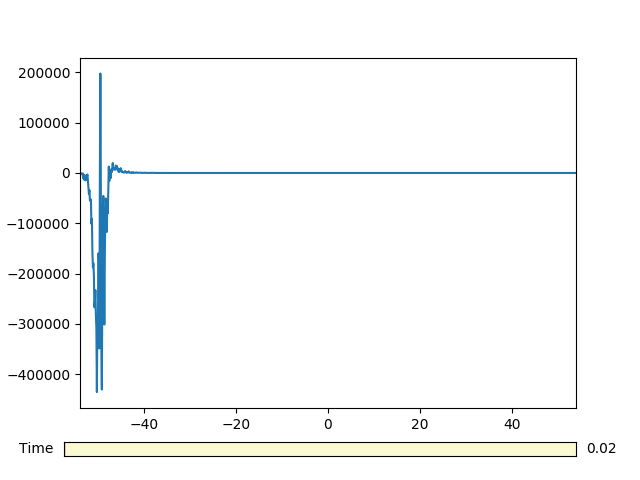

In [14]:
%matplotlib notebook
lpse.plot_field('S1_x')

In [15]:
lpse.fields()

<IPython.core.display.Javascript object>


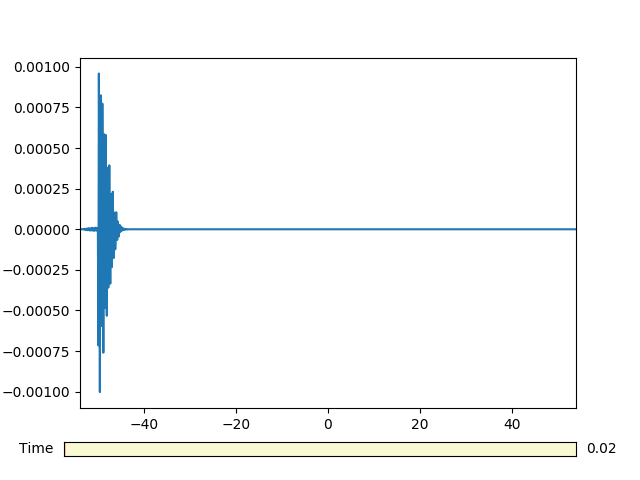

In [16]:
lpse.plot_field('E0_z')